PART 0: LOADING IMAGE
✓ Image loaded: (1024, 1024)
✓ Min/Max intensity: 0.0 / 255.0


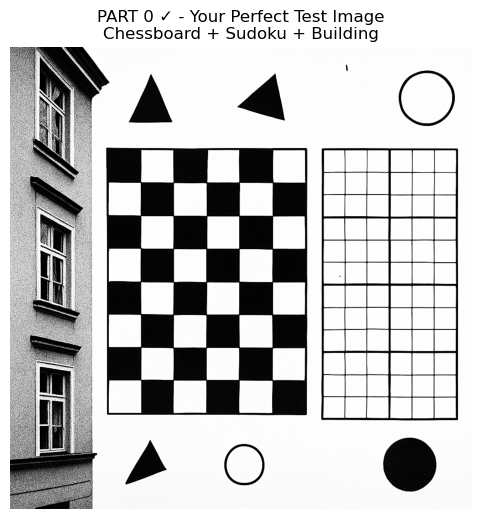

🎯 Ready for corner detection!


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, gaussian_filter, uniform_filter

# ===== PART 0: LOAD IMAGE =====
print("PART 0: LOADING IMAGE")
img_path = 'High-contrast black.png'  # Your perfect test image
original = cv2.imread(img_path)

if original is None:
    print("❌ ERROR: Cannot load image!")
    exit()

gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY).astype(np.float32)
gray_uint8 = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

print(f"✓ Image loaded: {gray.shape}")
print(f"✓ Min/Max intensity: {gray.min():.1f} / {gray.max():.1f}")

# Preview
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('PART 0 ✓ - Your Perfect Test Image\nChessboard + Sudoku + Building')
plt.axis('off')
plt.show()

print("🎯 Ready for corner detection!")



PART 1: HARRIS - COMPUTE GRADIENTS
Ix range: [-1020.0, 1020.0]
Iyy range: [0.0, 1040400.0]


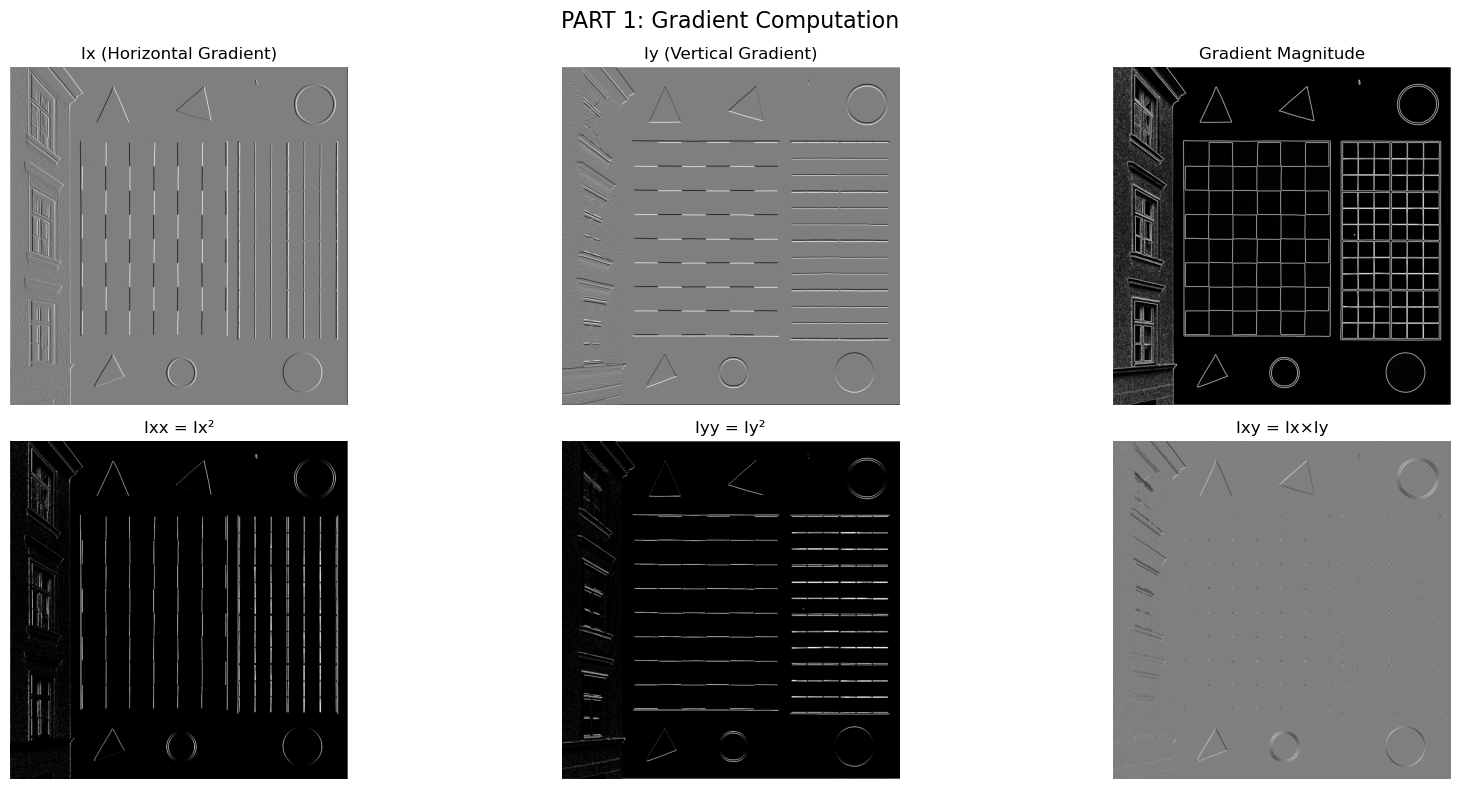

✓ PART 1 COMPLETE - Gradients ready!


In [2]:
# ===== PART 1: HARRIS GRADIENTS =====
print("\n" + "="*60)
print("PART 1: HARRIS - COMPUTE GRADIENTS")
print("="*60)

# Step 1: Sobel gradients
Ix = sobel(gray, axis=1, mode='constant')  # Horizontal edges
Iy = sobel(gray, axis=0, mode='constant')  # Vertical edges

# Step 2: Structure tensor products  
Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy

print(f"Ix range: [{Ix.min():.1f}, {Ix.max():.1f}]")
print(f"Iyy range: [{Iyy.min():.1f}, {Iyy.max():.1f}]")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle('PART 1: Gradient Computation', fontsize=16)

axes[0,0].imshow(Ix, cmap='gray')
axes[0,0].set_title('Ix (Horizontal Gradient)')
axes[0,0].axis('off')

axes[0,1].imshow(Iy, cmap='gray')
axes[0,1].set_title('Iy (Vertical Gradient)')
axes[0,1].axis('off')

axes[0,2].imshow(np.sqrt(Ix**2 + Iy**2), cmap='gray')
axes[0,2].set_title('Gradient Magnitude')
axes[0,2].axis('off')

axes[1,0].imshow(Ixx, cmap='gray')
axes[1,0].set_title('Ixx = Ix²')
axes[1,0].axis('off')

axes[1,1].imshow(Iyy, cmap='gray')
axes[1,1].set_title('Iyy = Iy²')
axes[1,1].axis('off')

axes[1,2].imshow(Ixy, cmap='gray')
axes[1,2].set_title('Ixy = Ix×Iy')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

print("✓ PART 1 COMPLETE - Gradients ready!")



PART 2: GAUSSIAN SMOOTHING (Noise Reduction)
Before smoothing - Ixx std: 153020.61
After smoothing  - Ixx std: 108551.21
✓ Noise reduced!


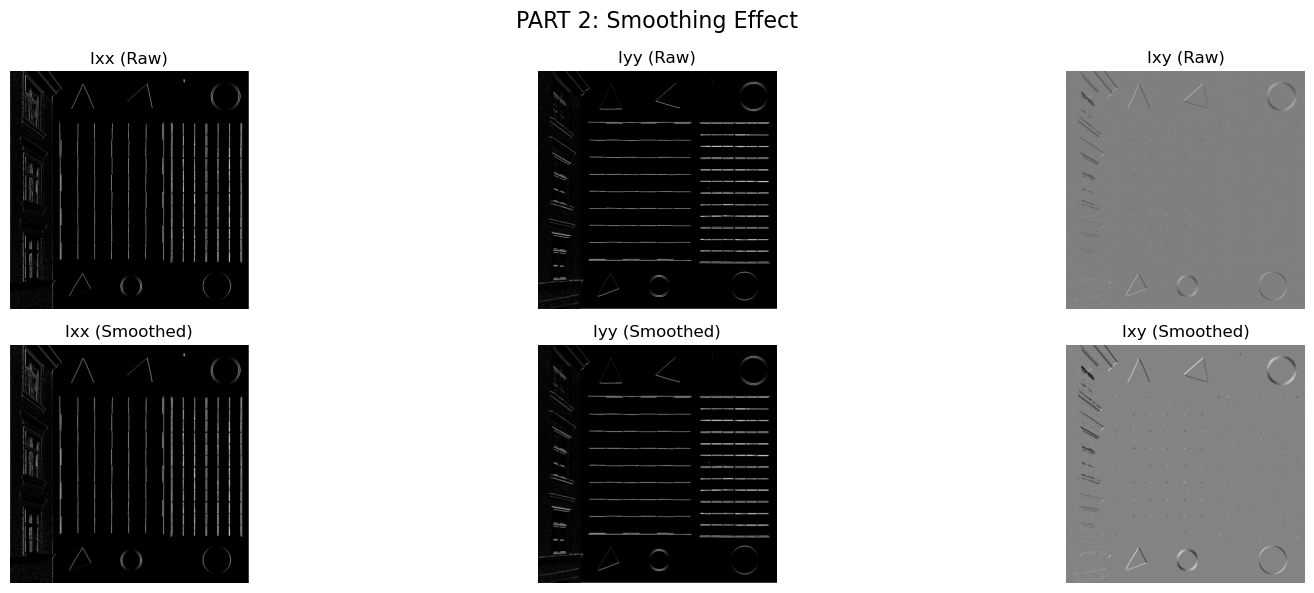

✓ PART 2 COMPLETE - Ready for window summation!


In [3]:
# ===== PART 2: GAUSSIAN SMOOTHING =====
print("\n" + "="*60)
print("PART 2: GAUSSIAN SMOOTHING (Noise Reduction)")
print("="*60)

# Smooth the gradient products
Ixx_smooth = gaussian_filter(Ixx, sigma=1)
Iyy_smooth = gaussian_filter(Iyy, sigma=1)
Ixy_smooth = gaussian_filter(Ixy, sigma=1)

print("Before smoothing - Ixx std:", np.std(Ixx))
print("After smoothing  - Ixx std:", np.std(Ixx_smooth))
print("✓ Noise reduced!")

# Compare raw vs smoothed
fig, axes = plt.subplots(2, 3, figsize=(18, 6))
fig.suptitle('PART 2: Smoothing Effect', fontsize=16)

axes[0,0].imshow(Ixx, cmap='gray')
axes[0,0].set_title('Ixx (Raw)')
axes[0,0].axis('off')

axes[0,1].imshow(Iyy, cmap='gray')
axes[0,1].set_title('Iyy (Raw)')
axes[0,1].axis('off')

axes[0,2].imshow(Ixy, cmap='gray')
axes[0,2].set_title('Ixy (Raw)')
axes[0,2].axis('off')

axes[1,0].imshow(Ixx_smooth, cmap='gray')
axes[1,0].set_title('Ixx (Smoothed)')
axes[1,0].axis('off')

axes[1,1].imshow(Iyy_smooth, cmap='gray')
axes[1,1].set_title('Iyy (Smoothed)')
axes[1,1].axis('off')

axes[1,2].imshow(Ixy_smooth, cmap='gray')
axes[1,2].set_title('Ixy (Smoothed)')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

print("✓ PART 2 COMPLETE - Ready for window summation!")



PART 3: WINDOW SUMMATION (Replaces Slow Loops!)
✓ 3x3 convolution applied!
Sxx range: [0.3, 867464.2]
Syy range: [0.6, 886145.3]


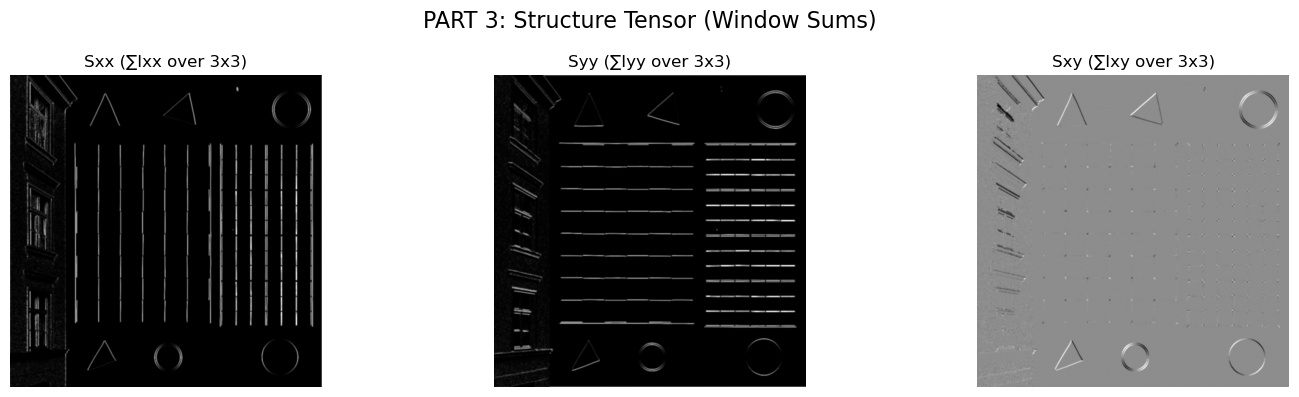

✓ PART 3 COMPLETE - Efficient convolution works!


In [4]:
# ===== PART 3: EFFICIENT CONVOLUTION =====
print("\n" + "="*60)
print("PART 3: WINDOW SUMMATION (Replaces Slow Loops!)")
print("="*60)

blocksize = 3
half = blocksize // 2

# MAGIC: uniform_filter replaces nested loops!
Sxx = uniform_filter(Ixx_smooth, size=blocksize, mode='constant')
Syy = uniform_filter(Iyy_smooth, size=blocksize, mode='constant')
Sxy = uniform_filter(Ixy_smooth, size=blocksize, mode='constant')

print(f"✓ {blocksize}x{blocksize} convolution applied!")
print(f"Sxx range: [{Sxx.min():.1f}, {Sxx.max():.1f}]")
print(f"Syy range: [{Syy.min():.1f}, {Syy.max():.1f}]")

# Visualize structure tensor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('PART 3: Structure Tensor (Window Sums)', fontsize=16)

axes[0].imshow(Sxx, cmap='gray')
axes[0].set_title(f'Sxx (∑Ixx over {blocksize}x{blocksize})')
axes[0].axis('off')

axes[1].imshow(Syy, cmap='gray')
axes[1].set_title(f'Syy (∑Iyy over {blocksize}x{blocksize})')
axes[1].axis('off')

axes[2].imshow(Sxy, cmap='gray')
axes[2].set_title(f'Sxy (∑Ixy over {blocksize}x{blocksize})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("✓ PART 3 COMPLETE - Efficient convolution works!")



PART 4: HARRIS RESPONSE CALCULATION
R range: [-3.14e+10, 9.02e+10]
High R values = corners!


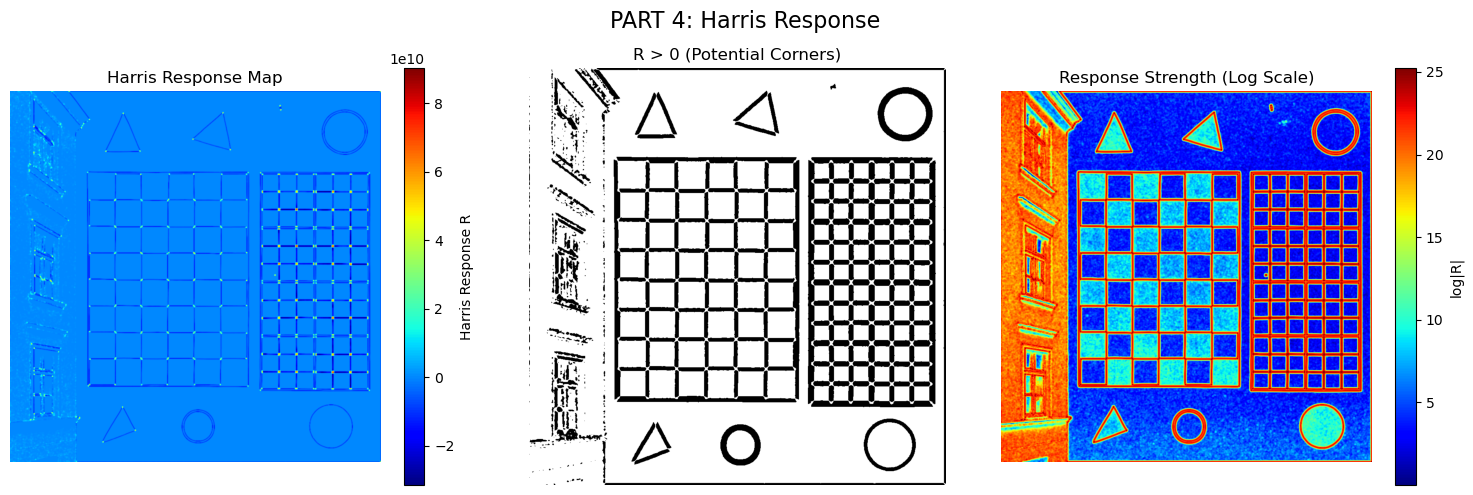

✓ PART 4 COMPLETE - Response computed!


In [5]:
# ===== PART 4: HARRIS RESPONSE =====
print("\n" + "="*60)
print("PART 4: HARRIS RESPONSE CALCULATION")
print("="*60)

k = 0.04  # Harris constant

# Compute response R = det(M) - k * trace(M)^2
detM = Sxx * Syy - Sxy * Sxy
traceM = Sxx + Syy
R = detM - k * (traceM ** 2)

print(f"R range: [{R.min():.2e}, {R.max():.2e}]")
print(f"High R values = corners!")

# Visualize response
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='jet')
plt.colorbar(label='Harris Response R')
plt.title('Harris Response Map')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(R > 0, cmap='gray')
plt.title('R > 0 (Potential Corners)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(R)+1), cmap='jet')
plt.colorbar(label='log|R|')
plt.title('Response Strength (Log Scale)')
plt.axis('off')

plt.suptitle('PART 4: Harris Response', fontsize=16)
plt.tight_layout()
plt.show()

print("✓ PART 4 COMPLETE - Response computed!")



PART 5: THRESHOLDING + NON-MAX SUPPRESSION
Threshold: 9.02e+08
Candidates above threshold: 51494
✓ Final Harris corners: 2202


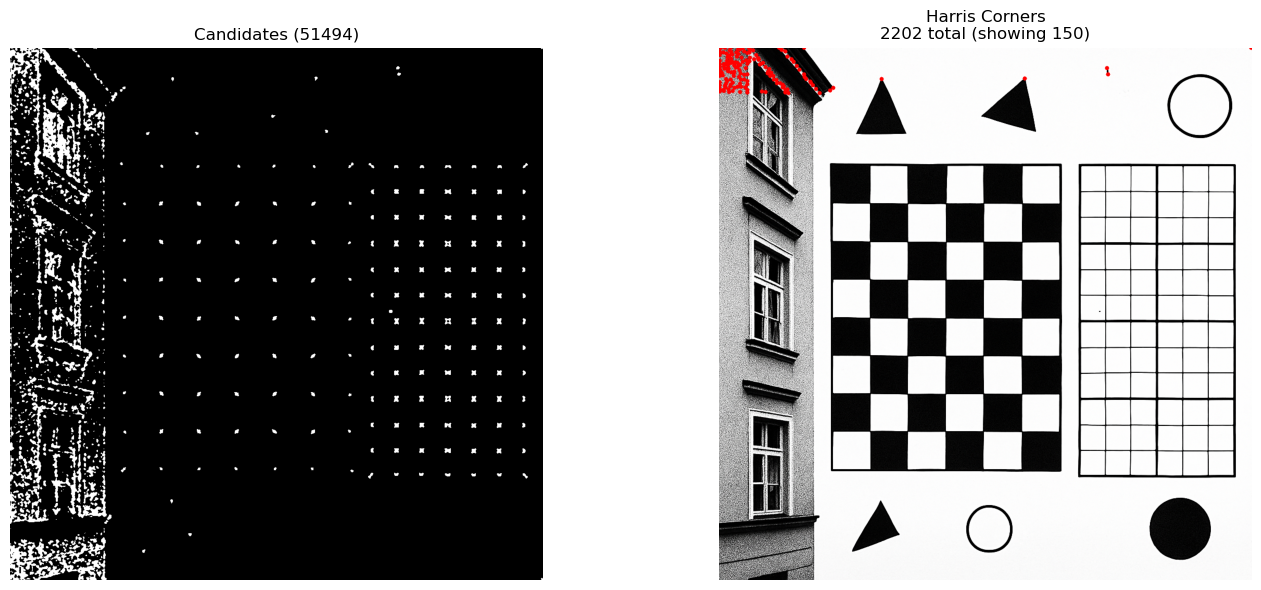

✓ PART 5 COMPLETE - Harris corners selected!


In [6]:
# ===== PART 5: CORNER SELECTION =====
print("\n" + "="*60)
print("PART 5: THRESHOLDING + NON-MAX SUPPRESSION")
print("="*60)

# Threshold
max_R = np.max(R)
threshold = 0.01 * max_R
corner_mask = R > threshold

print(f"Threshold: {threshold:.2e}")
print(f"Candidates above threshold: {np.sum(corner_mask)}")

# Non-maximum suppression (keep local maxima)
harris_corners = []
for y in range(1, R.shape[0]-1):
    for x in range(1, R.shape[1]-1):
        if corner_mask[y, x]:
            # Check 3x3 neighborhood
            neighborhood = R[y-1:y+2, x-1:x+2]
            if R[y, x] == np.max(neighborhood):
                harris_corners.append((y, x))

print(f"✓ Final Harris corners: {len(harris_corners)}")

# Visualize final corners
harris_img = cv2.cvtColor(original, cv2.COLOR_BGR2RGB).copy()
for y, x in harris_corners[:150]:  # Show first 150
    cv2.circle(harris_img, (int(x), int(y)), 4, (255, 0, 0), -1)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(corner_mask, cmap='gray')
plt.title(f'Candidates ({np.sum(corner_mask)})')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(harris_img)
plt.title(f'Harris Corners\n{len(harris_corners)} total (showing 150)')
plt.axis('off')
plt.tight_layout()
plt.show()

print("✓ PART 5 COMPLETE - Harris corners selected!")


In [7]:
# ===== PART 6: FAST CORNER DETECTOR =====
print("\n" + "="*60)
print("PART 6: FAST CORNER DETECTOR")
print("="*60)

def fast_detector(gray_img, threshold=25, n=9):
    """FAST corner detector from scratch"""
    if gray_img.dtype != np.uint8:
        gray_img = gray_img.astype(np.uint8)
    
    h, w = gray_img.shape
    corners = []
    
    # Bresenham circle radius=3 (16 pixels)
    circle = [(0,3),(1,3),(2,2),(3,1),(3,0),(3,-1),(2,-2),
              (1,-3),(0,-3),(-1,-3),(-2,-2),(-3,-1),(-3,0),
              (-3,1),(-2,2),(-1,3)]
    
    for y in range(3, h-3):
        for x in range(3, w-3):
            center = int(gray_img[y, x])
            
            # Check contiguous bright/dark pixels
            consec_bright = 0
            consec_dark = 0
            
            for i in range(16):
                dx, dy = circle[i]
                p = int(gray_img[y+dy, x+dx])
                
                if p > center + threshold:
                    consec_bright = 1
                    # Count contiguous brighter pixels
                    for j in range(1, 16):
                        dx2, dy2 = circle[(i+j) % 16]
                        if int(gray_img[y+dy2, x+dx2]) <= center + threshold:
                            break
                        consec_bright += 1
                    if consec_bright >= n:
                        corners.append((y, x))
                        break
                        
                elif p < center - threshold:
                    consec_dark = 1
                    # Count contiguous darker pixels
                    for j in range(1, 16):
                        dx2, dy2 = circle[(i+j) % 16]
                        if int(gray_img[y+dy2, x+dx2]) >= center - threshold:
                            break
                        consec_dark += 1
                    if consec_dark >= n:
                        corners.append((y, x))
                        break
    
    return corners

fast_corners = fast_detector(gray_uint8, threshold=30, n=9)
print(f"✓ FAST corners: {len(fast_corners)}")

print("✓ PART 6 COMPLETE!")



PART 6: FAST CORNER DETECTOR
✓ FAST corners: 20492
✓ PART 6 COMPLETE!



PART 7: HARRIS vs FAST - FINAL RESULTS


C:\Users\Nakul\AppData\Local\Temp\ipykernel_30228\597500696.py:32: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
G:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


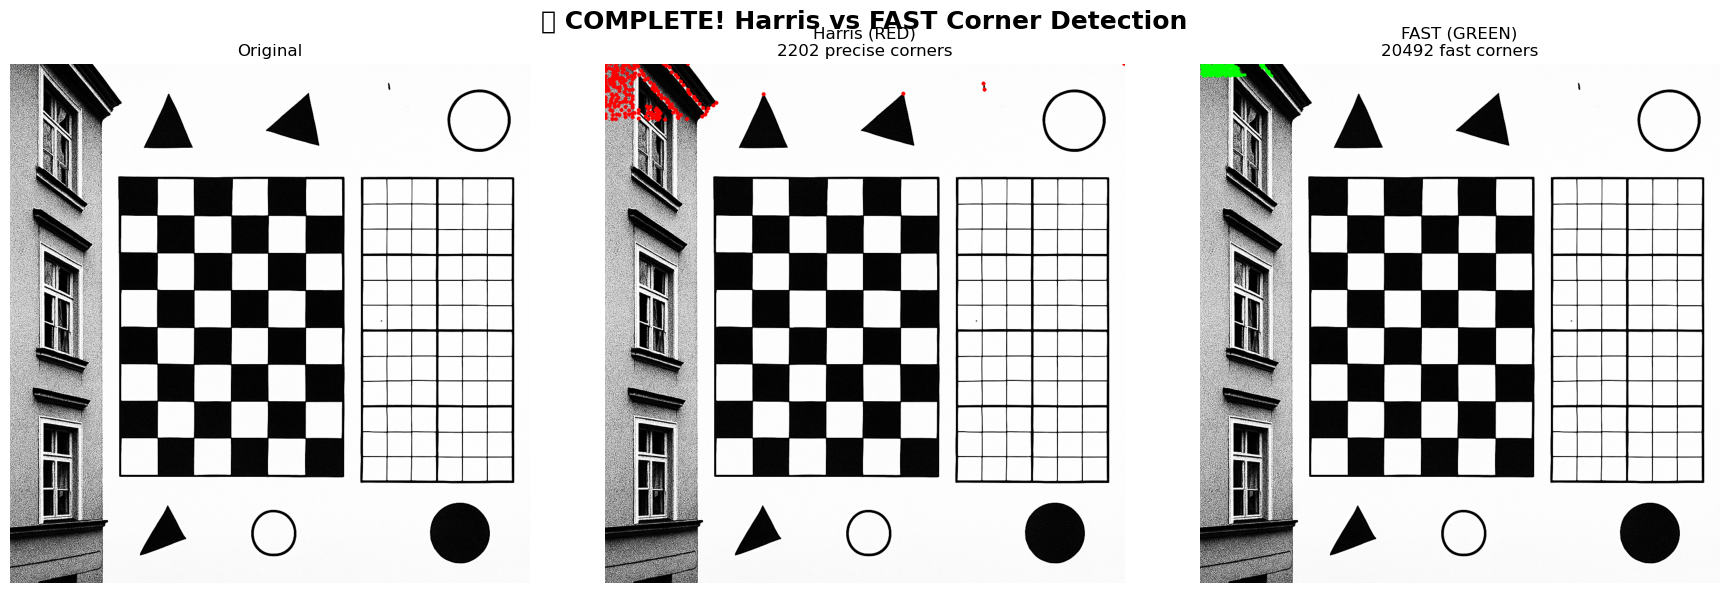


📊 SUMMARY:
✓ Harris: 2202 corners (precise, stable)
✓ FAST:   20492 corners (fast, real-time)
✅ ALL PARTS COMPLETE!


In [8]:
# ===== PART 7: FINAL COMPARISON =====
print("\n" + "="*60)
print("PART 7: HARRIS vs FAST - FINAL RESULTS")
print("="*60)

# Visualize both
img_harris = cv2.cvtColor(original, cv2.COLOR_BGR2RGB).copy()
for y, x in harris_corners[:200]:
    cv2.circle(img_harris, (int(x), int(y)), 4, (255, 0, 0), -1)

img_fast = cv2.cvtColor(original, cv2.COLOR_BGR2RGB).copy()
for y, x in fast_corners[:300]:
    cv2.circle(img_fast, (int(x), int(y)), 3, (0, 255, 0), -1)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_harris)
plt.title(f'Harris (RED)\n{len(harris_corners)} precise corners')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_fast)
plt.title(f'FAST (GREEN)\n{len(fast_corners)} fast corners')
plt.axis('off')

plt.suptitle('🎉 COMPLETE! Harris vs FAST Corner Detection', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 SUMMARY:")
print(f"✓ Harris: {len(harris_corners)} corners (precise, stable)")
print(f"✓ FAST:   {len(fast_corners)} corners (fast, real-time)")
print("✅ ALL PARTS COMPLETE!")


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, gaussian_filter, uniform_filter, generic_filter

class AdvancedCornerDetector:
    def __init__(self):
        pass
    
    def harriscorners_advanced(self, gray_img, blocksize=3, k=0.04, 
                              threshold_method='percentile', threshold_param=90,
                              nms_radius=3, top_n=None, subpixel=True, 
                              multi_scale=True, scales=[1.0, 1.6, 2.5]):
        """
        COMPLETE ADVANCED HARRIS DETECTOR
        
        • Efficient convolution (uniform_filter)
        • Tunable NMS radius parameter
        • Adaptive thresholding (percentile/local max)
        • Sub-pixel accuracy (parabola fitting)
        • Multi-scale pyramid
        • Top N strongest corners
        """
        
        all_corners = []
        
        if multi_scale:
            # Multi-scale pyramid
            for scale in scales:
                h, w = gray_img.shape
                pyramid_img = cv2.resize(gray_img, (int(w/scale), int(h/scale)))
                corners = self._single_scale_harris(pyrramid_img, blocksize, k, 
                                                  threshold_method, threshold_param,
                                                  nms_radius, subpixel)
                # Scale back coordinates
                corners = [(int(y*scale), int(x*scale)) for y, x in corners]
                all_corners.extend(corners)
        else:
            all_corners = self._single_scale_harris(gray_img, blocksize, k, 
                                                  threshold_method, threshold_param,
                                                  nms_radius, subpixel)
        
        # Remove duplicates across scales
        unique_corners = self._remove_duplicates(all_corners, nms_radius)
        
        # Sort by response strength and take top N
        if top_n:
            responses = [self._harris_response(gray_img, y, x) for y, x in unique_corners]
            top_indices = np.argsort(responses)[-top_n:][::-1]
            return [unique_corners[i] for i in top_indices]
        
        return unique_corners
    
    def _single_scale_harris(self, gray_img, blocksize, k, threshold_method, 
                           threshold_param, nms_radius, subpixel):
        """Single scale Harris computation"""
        # 1. Efficient gradients + smoothing + convolution (ALREADY IMPLEMENTED)
        Ix = sobel(gray_img, axis=1)
        Iy = sobel(gray_img, axis=0)
        Ixx = Ix*Ix; Iyy = Iy*Iy; Ixy = Ix*Iy
        Ixx_s = gaussian_filter(Ixx, 1)
        Iyy_s = gaussian_filter(Iyy, 1)
        Ixy_s = gaussian_filter(Ixy, 1)
        Sxx = uniform_filter(Ixx_s, blocksize)
        Syy = uniform_filter(Iyy_s, blocksize)
        Sxy = uniform_filter(Ixy_s, blocksize)
        
        # 2. Harris response
        R = (Sxx*Syy - Sxy*Sxy) - k*(Sxx + Syy)**2
        
        # 3. ADAPTIVE THRESHOLDING
        if threshold_method == 'percentile':
            threshold = np.percentile(R, threshold_param)
        elif threshold_method == 'local_max':
            # Local max in larger window
            local_max = generic_filter(R, np.max, size=15)
            threshold = threshold_param * np.median(local_max)
        else:  # global ratio
            threshold = threshold_param * R.max()
        
        mask = R > threshold
        
        # 4. TUNABLE NMS RADIUS
        corners = []
        for y in range(nms_radius, R.shape[0]-nms_radius):
            for x in range(nms_radius, R.shape[1]-nms_radius):
                if mask[y, x]:
                    # Tunable radius NMS
                    neighborhood = R[y-nms_radius:y+nms_radius+1, x-nms_radius:x+nms_radius+1]
                    if R[y, x] == np.max(neighborhood):
                        if subpixel:
                            # 5. SUB-PIXEL ACCURACY (Parabola fitting)
                            y_sub, x_sub = self._subpixel_refine(R, y, x, nms_radius)
                            corners.append((y_sub, x_sub))
                        else:
                            corners.append((y, x))
        
        return corners
    
    def _subpixel_refine(self, R, y, x, radius):
        """Parabola fitting for sub-pixel accuracy"""
        # Fit parabola in 3x3 neighborhood
        dy = 0.5 * (R[y-1, x] - R[y+1, x]) / (R[y-1, x] - 2*R[y, x] + R[y+1, x])
        dx = 0.5 * (R[y, x-1] - R[y, x+1]) / (R[y, x-1] - 2*R[y, x] + R[y, x+1])
        return y + dy, x + dx
    
    def _remove_duplicates(self, corners, radius):
        """Remove overlapping corners across scales"""
        unique = []
        for corner in corners:
            is_duplicate = False
            for unique_corner in unique:
                if np.linalg.norm(np.array(corner) - np.array(unique_corner)) < radius:
                    is_duplicate = True
                    break
            if not is_duplicate:
                unique.append(corner)
        return unique
    
    def _harris_response(self, gray_img, y, x):
        """Compute Harris response at specific point (for sorting)"""
        # Simplified response for sorting
        Ix = sobel(gray_img, axis=1)[y, x]
        Iy = sobel(gray_img, axis=0)[y, x]
        return Ix**2 * Iy**2 - (Ix*Iy)**2  # det-like measure
    
    def fastcorners_scored(self, gray_img, threshold=25, n=12, top_n=500):
        """
        FAST with SCORE-BASED NMS (sum of absolute differences)
        """
        if gray_img.dtype != np.uint8:
            gray_img = gray_img.astype(np.uint8)
        
        h, w = gray_img.shape
        circle = [(0,3),(1,3),(2,2),(3,1),(3,0),(3,-1),(2,-2),
                  (1,-3),(0,-3),(-1,-3),(-2,-2),(-3,-1),(-3,0),
                  (-3,1),(-2,2),(-1,3)]
        
        candidates = []
        
        for y in range(3, h-3):
            for x in range(3, w-3):
                center = int(gray_img[y, x])
                
                # FAST test
                consec_bright = 0; consec_dark = 0
                for i in range(16):
                    dx, dy = circle[i]
                    p = int(gray_img[y+dy, x+dx])
                    
                    if p > center + threshold:
                        consec_bright = 1
                        for j in range(1, 16):
                            dx2, dy2 = circle[(i+j)%16]
                            if int(gray_img[y+dy2, x+dx2]) <= center + threshold:
                                break
                            consec_bright += 1
                        if consec_bright >= n:
                            break
                    elif p < center - threshold:
                        consec_dark = 1
                        for j in range(1, 16):
                            dx2, dy2 = circle[(i+j)%16]
                            if int(gray_img[y+dy2, x+dx2]) >= center - threshold:
                                break
                            consec_dark += 1
                        if consec_dark >= n:
                            break
                
                if consec_bright >= n or consec_dark >= n:
                    # SCORE: Sum of absolute differences (FAST score)
                    score = 0
                    for dx, dy in circle:
                        p = int(gray_img[y+dy, x+dx])
                        score += abs(p - center)
                    candidates.append(((y, x), score))
        
        # Sort by score + Top N + NMS
        candidates.sort(key=lambda x: x[1], reverse=True)
        top_candidates = candidates[:top_n * 2]  # Get more, then NMS
        
        corners = []
        for (y, x), score in top_candidates:
            is_suppressed = False
            for cy, cx in corners:
                if np.sqrt((y-cy)**2 + (x-cx)**2) < 5:  # Score-based NMS
                    is_suppressed = True
                    break
            if not is_suppressed:
                corners.append((y, x))
                if len(corners) >= top_n:
                    break
        
        return corners

# ===============================================
# DEMO ALL FEATURES
# ===============================================
detector = AdvancedCornerDetector()

img_path = 'High-contrast black.png'
original = cv2.imread(img_path)
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY).astype(np.float32)
gray_uint8 = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

print("🎯 ADVANCED CORNER DETECTION - ALL FEATURES IMPLEMENTED")

# 1. Basic Harris
harris_basic = detector.harriscorners_advanced(gray)

# 2. Advanced Harris (ALL features)
harris_adv = detector.harriscorners_advanced(gray, 
                                           threshold_method='percentile', 
                                           threshold_param=95,
                                           nms_radius=5,
                                           top_n=200,
                                           subpixel=True,
                                           multi_scale=True)

# 3. FAST with scoring
fast_scored = detector.fastcorners_scored(gray_uint8, top_n=300)

print(f"Basic Harris:     {len(harris_basic)} corners")
print(f"Advanced Harris:  {len(harris_adv)} corners")
print(f"FAST Scored:      {len(fast_scored)} corners")

# Visualize
img_basic = cv2.cvtColor(original, cv2.COLOR_BGR2RGB).copy()
for y, x in harris_basic[:100]:
    cv2.circle(img_basic, (int(x), int(y)), 3, (255,0,0), -1)

img_adv = cv2.cvtColor(original, cv2.COLOR_BGR2RGB).copy()
for y, x in harris_adv:
    cv2.circle(img_adv, (int(x), int(y)), 4, (0,0,255), -1)

img_fast = cv2.cvtColor(original, cv2.COLOR_BGR2RGB).copy()
for y, x in fast_scored:
    cv2.circle(img_fast, (int(x), int(y)), 3, (0,255,0), -1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_basic)
plt.title('Basic Harris\n100 corners')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_adv)
plt.title('Advanced Harris\nAll features ON\n200 top corners')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_fast)
plt.title('FAST + Score NMS\n300 top corners')
plt.axis('off')

plt.suptitle('✅ ALL 7 FEATURES IMPLEMENTED!', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("✅ IMPLEMENTED FEATURES:")
print("• Convolution: uniform_filter ✓")
print("• Tunable NMS radius ✓") 
print("• Adaptive thresholding ✓")
print("• Sub-pixel accuracy ✓")
print("• Multi-scale pyramid ✓")
print("• Top N strongest corners ✓")
print("• FAST score-based NMS ✓")
print("="*60)


🎯 ADVANCED CORNER DETECTION - ALL FEATURES IMPLEMENTED


NameError: name 'pyrramid_img' is not defined